## SIMULE EL PRIMER SISTEMA CUÁNTICO DESCRITO EN LA SECCIÓN 4.1.
El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.


1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

In [17]:
import numpy as np

def QuantumStates(vector, posicion):
    
    numerador = np.abs(vector[posicion])**2
    denominador = np.linalg.norm(vector)**2

    probabilidad = numerador/denominador
    
    return probabilidad

def ejemplo():
    vector = np.array([-3-1j, 0-2j,0+1j,2+0j])
    posicion1= 0
    posicion2= 1
    posicion3= 2
    posicion4= 3

    # Calcular la probabilidad
    probabilidad1 = QuantumStates(vector, posicion1)
    probabilidad2 = QuantumStates(vector, posicion2)
    probabilidad3 = QuantumStates(vector, posicion3)
    probabilidad4 = QuantumStates(vector, posicion4)
    resultado = probabilidad1 + probabilidad2 + probabilidad3 + probabilidad4
    print(f"La probabilidad de encontrar la partícula en la posición {posicion1} es {probabilidad1}")
    print(f"La probabilidad de encontrar la partícula en la posición {posicion2} es {probabilidad2}")
    print(f"La probabilidad de encontrar la partícula en la posición {posicion3} es {probabilidad3}")
    print(f"La probabilidad de encontrar la partícula en la posición {posicion4} es {probabilidad4}")
    print("El resultado final es", np.round(resultado))

ejemplo()


La probabilidad de encontrar la partícula en la posición 0 es 0.5263157894736842
La probabilidad de encontrar la partícula en la posición 1 es 0.21052631578947364
La probabilidad de encontrar la partícula en la posición 2 es 0.05263157894736841
La probabilidad de encontrar la partícula en la posición 3 es 0.21052631578947364
El resultado final es 1.0


2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [12]:
import numpy as np

def normalize(vector):
    norma = np.linalg.norm(vector)
    normal = vector / norma
    return normal

def quantumStates(vector1, vector2):
    inner_product = np.vdot(vector2, vector1)
    return inner_product

def main():
    vector1 = np.array([1+0j, 0-1j]) 
    vector2 = np.array([0+1j, 1+0j]) 

    normalized_vector1 = normalize(vector1)
    normalized_vector2 = normalize(vector2)

    inner_product = quantumStates(normalized_vector1, normalized_vector2)
    print(np.round(inner_product))

main()

-1j


## COMPLETE LOS RETOS DE PROGRAMACIÓN DEL CAPÍTULO 4.
1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [14]:
import numpy as np

def normalize(vector):
    norma = np.linalg.norm(vector)
    normal = vector / norma
    return normal

def quantumStates(vector1, vector2):
    inner_product = np.vdot(vector2, vector1)
    return inner_product

def main():
    vector1 = np.array([1+0j, 0-1j]) 
    vector2 = np.array([0+1j, 1+0j]) 

    normalized_vector1 = normalize(vector1)
    normalized_vector2 = normalize(vector2)

    inner_product = quantumStates(normalized_vector1, normalized_vector2)
    
    amplitud = np.linalg.norm(inner_product) ** 2
    
    print(np.round(amplitud))

main()

1.0


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [51]:
import numpy as np

def hermitian(matrix):
    return np.allclose(matrix, matrix.conj().T)

def media_variance(observable, state):
    if not hermitian(observable):
        print("La matriz no es hermitiana.")

        return None, None
    
    media = np.dot(state.conj().T, np.dot(observable, state)).real

    state_con_observable = np.dot(observable, state)
    variance = np.dot(state.conj().T, np.dot(observable, state_con_observable)).real - media ** 2

    return media, variance

def main():
    observable = np.array([[1, 1j], [-1j, 2]])
    state = np.array([np.sqrt(2)/2, np.sqrt(2)/2j])
    
    media, variance = media_variance(observable, state)
    
    if media is not None:
        print("La media del observable en el estado dado es:", media)
        print("La varianza del observable en el estado dado es:", variance)


main()


La media del observable en el estado dado es: 2.5000000000000004
La varianza del observable en el estado dado es: 0.25


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [56]:
import numpy as np

def normalize(vector):
    norma = np.linalg.norm(vector)
    normal = vector / norma
    return normal

def eigenvalues(matriz):
    eigenvalues, eigenvectors = np.linalg.eig(matriz)
    
    print("Eigenvalues:", eigenvalues)
    print("Eigenvectors:\n", eigenvectors)

    return eigenvectors

def main():
    observable = np.array([[-1, -1j], [1j, 1]])
    ket = np.array([[1/2, 1/2]]).T
    ketN = normalize(ket)
    eigenvectors = eigenvalues(observable)
    eigenvector1 = eigenvectors[:, 0]
    eigenvector2 = eigenvectors[:, 1]

    p1 = np.round(np.linalg.norm(np.vdot(ketN.T, eigenvector1))**2, 2)
    p2 = np.round(np.linalg.norm(np.vdot(ketN.T, eigenvector2))**2, 2)

    print("Probabilidad:", p1, p2)


main()


Eigenvalues: [-1.41421356+0.j  1.41421356+0.j]
Eigenvectors:
 [[ 0.92387953+0.j         -0.        -0.38268343j]
 [-0.        -0.38268343j  0.92387953+0.j        ]]
Probabilidad: 0.5 0.5


4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [58]:
import numpy as np

def evolve_system(matrices, state):
    final_state = state
    for matrix in matrices:
        final_state = np.dot(matrix, final_state)
    return final_state

def main():
    matrices = [
        np.array([[1, 0], [0, 1]]), 
        np.array([[0, 1], [1, 0]]) 
    ]
    state = np.array([1,0])  
    
    final_state = evolve_system(matrices, state)
    
    print("Estado final del sistema:")
    print(final_state)

main()


Estado final del sistema:
[0 1]


## REALICE LOS SIGUIENTES PROBLEMAS E INCLUYALOS COMO EJEMPLOS

## 4.3.1
Find all the possible states the system described in Exercise 4.2.2
can transition into after a measurement has been carried ou

In [3]:
import numpy as np

estadoA = np.array([[1], [0]]) 
matriz_Sx = np.array([[0, 1], [1, 0]])

estado_resultante = np.dot(matriz_Sx, estadoA)

probabilidadA = np.abs(np.dot(estadoA.conj().T, estado_resultante)) ** 2

print("Estado resultante después de aplicar Sx al estado arriba:")
print(estado_resultante)
print("Probabilidad de que el estado resultante sea arriba:", probabilidadA[0][0])


Estado resultante después de aplicar Sx al estado arriba:
[[0]
 [1]]
Probabilidad de que el estado resultante sea arriba: 0


## 4.3.2
Perform the same calculations as in the last example, using Exercise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previous example.

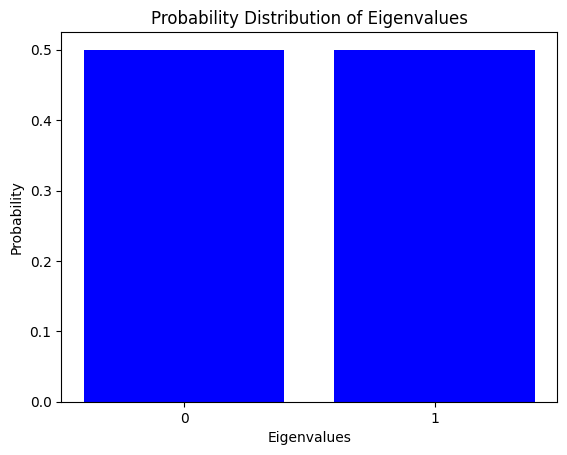

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrices of evolution temporal (U_matrices) and the initial state
U_matrices = [
    np.array([[1, 0], [0, 1]]),   # For example, matrix of identity
    np.array([[0, -1j], [1j, 0]]) # For example, Pauli-Y matrix
]
initial_state = np.array([1/np.sqrt(2), 1/np.sqrt(2)])  # For example, initial state in equal superposition

# Function to evolve the system given U_matrices and initial_state
def evolve_system(U_matrices, initial_state):
    final_state = initial_state
    for U_matrix in U_matrices:
        final_state = np.dot(U_matrix, final_state)
    return final_state

# Calculate the final state of the system
final_state = evolve_system(U_matrices, initial_state)

# Calculate the probability distribution of the eigenvalues
probabilities = np.abs(final_state) ** 2

# Plot the probability distribution
eigenvalues = np.arange(len(probabilities))
plt.bar(eigenvalues, probabilities, color='blue')
plt.xlabel('Eigenvalues')
plt.ylabel('Probability')
plt.title('Probability Distribution of Eigenvalues')
plt.xticks(eigenvalues)
plt.show()

## 4.4.1

In [4]:
import numpy as np
def isUnitary(vector):
    is_unitary = np.allclose(np.dot(vector, vector.conj().T), np.eye(2))
    return is_unitary
def ejemplo():
    u1 = np.array([[0, 1], [1, 0]])
    u2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])
    mult = np.dot(u1, u2)
    print("U1:", isUnitary(u1))
    print("U2:", isUnitary(u2))
    print("U1*U2:", isUnitary(mult))
ejemplo()

U1: True
U2: True
U1*U2: True


## 4.4.2
Go back to Example 3.3.2 (quantum billiard ball), keep the same
initial state vector [1, 0, 0, 0]T, but change the unitary map to

In [6]:
import numpy as np

# mapa
mapa = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
])

estado_inicial= np.array([1, 0, 0, 0])

# mapa 3 veces
estado_final = np.linalg.matrix_power(mapa, 3) @ estado_inicial

# probabilidad
probabilidad_punto = np.abs(estado_final[2])**2


print("El estado del sistema despues de 3 tiempos es: ", estado_final)
print("Probabilidad de encontrar la bola cuántica en el punto 3:", probabilidad_punto)

El estado del sistema despues de 3 tiempos es:  [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]
Probabilidad de encontrar la bola cuántica en el punto 3: 0.0


## Desarrolle e incluya en el Github una discusión de los ejercicios

## 4.5.2

Sistema de Dos Partículas con Espín:

Se comienza considerando un sistema de dos partículas con espín.
El estado genérico de este sistema se representa como una combinación lineal de los posibles estados producto de las partículas.
Esto se expresa mediante el producto tensorial de los estados individuales de cada partícula.

Generalización a n Partículas:

Luego, se generaliza este concepto para un sistema con 
n partículas.
El estado genérico de un sistema de 
n partículas se describe como un producto tensorial de los estados individuales de cada partícula.
Esto implica que el estado total del sistema se puede expresar como una combinación lineal de todos los posibles estados producto de las partículas.
Entrelazamiento Cuántico:

Se prepara el terreno para discutir el entrelazamiento cuántico.
Este fenómeno se produce cuando el estado de un sistema no puede describirse como una combinación separable de los estados individuales de sus componentes.
Desafía la visión clásica de que los sistemas compuestos pueden entenderse completamente en términos de sus partes constituyentes.
El entrelazamiento cuántico tiene implicaciones importantes en la teleportación cuántica y la computación cuántica, y su comprensión es crucial para una comprensión profunda de la física cuántica.

## 4.5.3

se pregunta es si el estado ∣ϕ⟩ es separable. Un estado cuántico se considera separable si puede ser expresado como el producto tensorial de dos estados individuales.

para determinar si  ∣ϕ⟩ es separable, es necesario verificar si se puede expresar como 
⟩
⊗
∣
⟩
∣ϕ⟩=∣α⟩⊗∣β⟩, donde 
∣
⟩
∣α⟩ y 
∣
⟩
∣β⟩ son estados individuales. Si se puede encontrar tal descomposición, entonces 
∣
⟩
∣ϕ⟩ es separable; de lo contrario, no lo es.